# estimation domain size dependence of LPM forces
Tim Tyree<br>
12.28.2022

In [1]:
# simplify initialization
from scipy.optimize import minimize
from lib.my_initialization import *
from lib import *
# from lib.measure.level_sets import comp_longest_level_set_and_smooth
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt, numpy as np
from mpltools import annotation
import random,scipy
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib as mpl #for colorbar
from scipy import stats

#for particle params to MSR generating functional
from scipy.signal import savgol_filter
import dask.bag as db
import seaborn as sns
# from lib.lib_care.measure.bootstrap import bin_and_bootstrap_xy_values_parallel

darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

#optional
# import cupy as cp
# cp.random.seed(42)
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plt.plot([1]*4)
plt.close()
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

# define module

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# scatter plot amax versus A

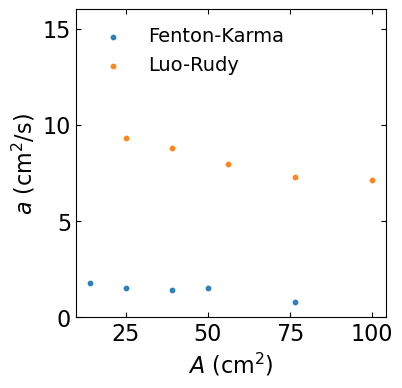

For the FK model, increasing $A$ by 444.4444444% increased $a$ by -55.6975344%.
For the FK model, increasing $A$ by 444% increased $a$ by -56%.
For the LR model, increasing $A$ by 300.0000000% increased $a$ by -23.5236207%.
For the LR model, increasing $A$ by 300% increased $a$ by -24%.


In [38]:
# scatter plot amax versus A
#src: from_wjr
DS=0.025 #cm/px
#recall amax versus A values from before
dict_amax_lst_fk=[]
for model,	width,	amax,	amax_again, D, Delta_D in [
    ('FK',	150,	1.6779,	1.6779, #0.0, 0),#0.05, 0),
         -0.06313856048623989,0.015406066199523744),
    ('FK',	200,	1.7812,	1.7811, #0.0, 0),##0.05, 0),
         0.11449546281753001,0.007987364738330576),
    ('FK',	250,	1.8334,	1.8337, #0.0, 0),#0.05, 0)
         0.20307175047033585,0.008569188343031837),
    ('FK',	283,	1.8492,1.8494, #0.0, 0),#0.05, 0)
         0.1699978601290549,0.016751440381045642),
    ('FK',	350,	1.8454,1.8453, #1.447357,0.022455, #0.0, 0),#0.05, 0)
         0.5230525259515364,0.022385509656234013),
     ]:
    # print(f"{width},{D},{Delta_D},{min_tdeath},{max_tdeath}")
    # FK at A=76.5625:
    # 350,0.28212721083867737,0.05638616673030058,600.0,1500.0
    # 350,0.5230525259515364,0.022385509656234013,300.0,1000.0
    # FK at A=50.0556:
    # 283,0.1699978601290549,0.016751440381045642,600.0,1500.0
    # 283,0.08835528394206124,0.009578146837089064,300.0,1000.0


    dict_amax_lst_fk.append(
        dict(model=model,width=width,amax=amax,amax_again=amax_again,D=D,Delta_D=Delta_D)
    )  
#heretim
#src: from_wjr
dict_amax_lst_lr=[]
for model,	width,	amax,	amax_again, D, Delta_D in [
    ('LR',	200,	10.147,	10.147, #0.0, 0),#0.05, 0),
         0.41579792802708637,0.1383129275716018), # as reported in Letter
    ('LR',	250,	10.5917,10.5941, #0.0, 0),##0.05, 0),
         0.884142229988156,0.08591228213410576),
    ('LR',	300,	11.4431,11.442, #0.0, 0),##0.05, 0),
         1.7371134990867834,0.21835134626786248),
     ('LR',	350,	11.5883,11.5875, #0.0, 0),##0.05, 0),
         2.152934418246597,0.24985450606055637),
    ('LR',	400,	11.606,	11.6056, #0.0, 0),##0.05, 0),
         2.2409580980757418,0.13694044386234994),
     ]:
    dict_amax_lst_lr.append(
        dict(model=model,width=width,amax=amax,amax_again=amax_again,D=D,Delta_D=Delta_D)
    )
df_fk = pd.DataFrame(dict_amax_lst_fk)
df_lr = pd.DataFrame(dict_amax_lst_lr)
#compute scatter plot xy values
df = df_fk
df['L']=df['width']*DS
df['A']=df['L']**2
df['Delta_amax'] = np.abs(df['amax'] -df['amax_again'])
x_values_fk = df['A'].values
y_values_fk = df['amax'].values - 2*df['D'].values
yerr_values_fk = df['Delta_amax'].values + 2*df['Delta_D'].values
df['a']=y_values_fk
df['Delta_a']=yerr_values_fk
df = df_lr
df['L']=df['width']*DS
df['A']=df['L']**2
df['Delta_amax'] = np.abs(df['amax'] -df['amax_again'])
x_values_lr = df['A'].values
# y_values_lr = df['amax'].values 
y_values_lr = df['amax'].values  - 2*df['D'].values
yerr_values_lr = df['Delta_amax'].values + 2*df['Delta_D'].values
df['a']=y_values_lr
df['Delta_a']=yerr_values_lr
figsize=(4,4)
#scatter plot amax versus A
fig,ax=plt.subplots(figsize=figsize)
fontsize=16
alpha=0.9
# #plot line plot traces
ax.scatter(x_values_fk,y_values_fk,color='C0',alpha=alpha,label='Fenton-Karma',s=10)
ax.scatter(x_values_lr,y_values_lr,color='C1',alpha=alpha,label='Luo-Rudy',s=10)
#format_plot
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$a$ (cm$^2$/s)',fontsize=fontsize)
# format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$a+2D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_ylim((0,16))
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False,loc='upper left')
# ax.legend(fontsize=fontsize-2,frameon=True)
plt.show()
#print the max percent change in a for increasing A
a_hi = df_fk.loc[df_fk['A']==df_fk['A'].max()]['a'].values[0]
a_lo = df_fk.loc[df_fk['A']==df_fk['A'].min()]['a'].values[0]
percent_change_amax = 1.*(a_hi - a_lo)/a_lo
# percent_change_amax = 1.*(df_fk['amax'].max() - df_fk['amax'].min())/df_fk['amax'].min()
percent_change_A = 1.*(df_fk['A'].max() - df_fk['A'].min())/df_fk['A'].min()
# percent_change_A = 1.*(df_fk['A'].max() - 25)/df_fk['A'].min()
print(f"For the FK model, increasing $A$ by {percent_change_A:.7%} increased $a$ by {percent_change_amax:.7%}.")
print(f"For the FK model, increasing $A$ by {percent_change_A:.0%} increased $a$ by {percent_change_amax:.0%}.")

#print the max percent change in a for increasing A
a_hi = df_lr.loc[df_lr['A']==df_lr['A'].max()]['a'].values[0]
a_lo = df_lr.loc[df_lr['A']==df_lr['A'].min()]['a'].values[0]
percent_change_amax = 1.*(a_hi - a_lo)/a_lo
# percent_change_amax = 1.*(df_lr['amax'].max() - df_lr['amax'].min())/df_lr['amax'].min()
percent_change_A = 1.*(df_lr['A'].max() - df_lr['A'].min())/df_lr['A'].min()
# print(f"For LR model, increasing $A$ by {percent_change_A:.7%} increased $a$ by {percent_change_amax:.7%}.")
print(f"For the LR model, increasing $A$ by {percent_change_A:.7%} increased $a$ by {percent_change_amax:.7%}.")
print(f"For the LR model, increasing $A$ by {percent_change_A:.0%} increased $a$ by {percent_change_amax:.0%}.")

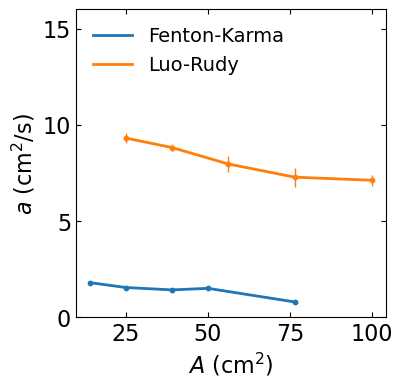

In [39]:
figsize=(4,4)
#scatter plot amax versus A
fig,ax=plt.subplots(figsize=figsize)
fontsize=16
alpha=1.
# #plot line plot traces
ax.scatter(x_values_fk,y_values_fk,color='C0',alpha=alpha,s=10)
ax.scatter(x_values_lr,y_values_lr,color='C1',alpha=alpha,s=10)
ax.plot(x_values_fk,y_values_fk,color='C0',alpha=alpha,label='Fenton-Karma',lw=2)
ax.plot(x_values_lr,y_values_lr,color='C1',alpha=alpha,label='Luo-Rudy',lw=2)
ax.errorbar(x_values_fk,y_values_fk,yerr_values_fk,color='C0',alpha=alpha,lw=1)#,label='Fenton-Karma')
ax.errorbar(x_values_lr,y_values_lr,yerr_values_lr,color='C1',alpha=alpha,lw=1)#,label='Luo-Rudy')
#format_plot
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$a$ (cm$^2$/s)',fontsize=fontsize)
# format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$a+2D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_ylim((0,16))
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False,loc='upper left')
# ax.legend(fontsize=fontsize-2,frameon=True)
plt.show()

In [40]:
#compute scatter plot xy values
df = df_fk
x_values_fk = df['A'].values
y_values_fk = df['amax'].values 
yerr_values_fk = df['Delta_amax'].values
df = df_lr
x_values_lr = df['A'].values
y_values_lr = df['amax'].values 
yerr_values_lr = df['Delta_amax'].values

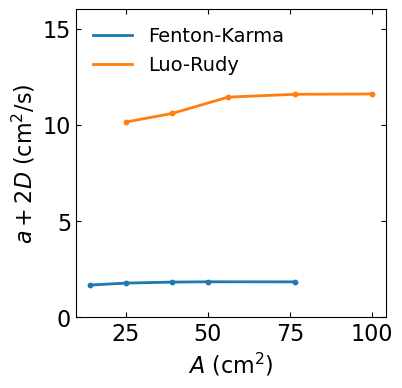

In [41]:
figsize=(4,4)
#scatter plot amax versus A
fig,ax=plt.subplots(figsize=figsize)
fontsize=16
alpha=1.
# #plot line plot traces
ax.scatter(x_values_fk,y_values_fk,color='C0',alpha=alpha,s=10)
ax.scatter(x_values_lr,y_values_lr,color='C1',alpha=alpha,s=10)
ax.plot(x_values_fk,y_values_fk,color='C0',alpha=alpha,label='Fenton-Karma',lw=2)
ax.plot(x_values_lr,y_values_lr,color='C1',alpha=alpha,label='Luo-Rudy',lw=2)
ax.errorbar(x_values_fk,y_values_fk,yerr_values_fk,color='C0',alpha=alpha,lw=1)#,label='Fenton-Karma')
ax.errorbar(x_values_lr,y_values_lr,yerr_values_lr,color='C1',alpha=alpha,lw=1)#,label='Luo-Rudy')
#format_plot
# format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$a$ (cm$^2$/s)',fontsize=fontsize)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$a+2D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_ylim((0,16))
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False,loc='upper left')
# ax.legend(fontsize=fontsize-2,frameon=True)
plt.show()

# estimate diffusion coefficients at a given domain size, as before

In [192]:
#############################################
# Luo-Rudy MSR for variable A
#############################################
msr_dir = f"{nb_dir}/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_msr.csv"
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_lr/250x250/tippos_per_c_001_annihilation_msr.csv"
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_lr/300x300/tippos_per_c_001_annihilation_msr.csv"
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_lr/350x350/tippos_per_c_001_annihilation_msr.csv"
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_lr/400x400/tippos_per_c_001_annihilation_msr.csv"


In [32]:
#######################)######################
# Fenton-Karma MSR for variable A
#############################################
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_creation_msr.csv"
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_fk/150x150/tippos_per_c_001_annihilation_msr.csv"
msr_dir = f"{nb_dir}/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_msr.csv"
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_fk/250x250/tippos_per_001_annihilation_msr.csv"


msr_dir = f"{nb_dir}/Data/from_wjr/positions_fk/283x283/tippos_per_1_annihilation_msr.csv"
# msr_dir = f"{nb_dir}/Data/from_wjr/positions_fk/350x350/tippos_per_102_annihilation_msr.csv"
#TODO: measure D for ^these msr_dir_fk values
#TODO: estimate a+2D and a for ^these msr_dir_fk values
#HINT: i think i already have a+2D available.  maybe i compute it again in this .ipynb...


In [33]:
283*283*DS*DS

50.055625000000006

283,0.1699978601290549,0.016751440381045642,600.0,1500.0


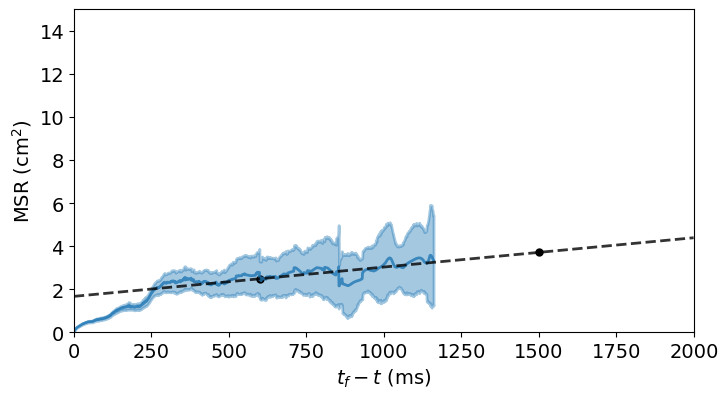

In [35]:
min_tdeath=600. #ms  #FK 
# min_tdeath=100. #ms  #LR
max_tdeath=1500. #ms  #FK 

# min_tdeath=300. #ms  #FK 
# max_tdeath=1000. #ms  #FK 

printing=True
c='C0'
# c='C1'
xlim = [0,2000]
assert os.path.exists(msr_dir)
df_bootstrap=pd.read_csv(msr_dir)
width = eval(msr_dir.split('/')[-2].split('x')[0])
x_values=df_bootstrap['tdeath_avg'].values
y_values=df_bootstrap['MSR'].values
yerr_values=df_bootstrap['Delta_MSR'].values
x_values.shape,y_values.shape,yerr_values.shape
# select msr from the full models for fitting
boo=x_values>=min_tdeath
boo&=x_values<max_tdeath
t_values=x_values[boo].copy()*1e-3
msr_values=y_values[boo].copy() 
# msr_values-= np.min(msr_values)
dict_output = compute_95CI_ols(x=t_values,y=msr_values)
D = dict_output['m']/8
Delta_D = dict_output['Delta_m']/8
if printing:
    #print(f"D = slope/8 = {D:.4f} +/- {Delta_D:.4f} (using timepoints from {min_tdeath}-{max_tdeath} ms)")
    #print_dict(dict_output)
    #print(f"width,D,Delta_D,min_tdeath,max_tdeath")
    print(f"{width},{D},{Delta_D},{min_tdeath},{max_tdeath}")
#plot expected
fig,ax=plt.subplots(figsize=(8,4.2))
#plot data
ax.plot(x_values,y_values,lw=2,alpha=0.8,c=c)
ax.fill_between(x_values,y_values-yerr_values,y_values+yerr_values,lw=2,alpha=0.4,color=c)
#plot linear fit
xv = np.arange(xlim[0],xlim[1],1)
yv = 1e-3*dict_output['m']*xv + dict_output['b']
ax.plot(xv,yv,'k--',lw=2,alpha=0.8)
#mark the start/end points
miny = 1e-3*dict_output['m']*min_tdeath + dict_output['b']
maxy = 1e-3*dict_output['m']*max_tdeath + dict_output['b']
ax.scatter([min_tdeath,max_tdeath],[miny,maxy],marker='.',color='k',s=100)
#format plot
format_plot(ax=ax,xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)',fontsize=14)
ax.set_xlim(xlim)
# ax.set_ylim([0,8])
ax.set_ylim([0,15])
# ax.set_ylim([0,30])
plt.show()

Hi Wouter,

I reran the a vs. A analysis— this time with $D$ measured independently for each $A$.
I didn't do this before because I got $D<0$ for the FK model on the 150x150 domain.
The result of allowing D=D(A) resulted in $a$ decreasing with $A$, which better supports the key claim of our paper.

Best,
Tim

Diffcoeff estimates for LR:
```
width,D,Delta_D,min_tdeath,max_tdeath 
200,0.41579792802708637,0.1383129275716018,100.0,1500.0
250,0.884142229988156,0.08591228213410576,100.0,1500.0
300,1.7371134990867834,0.21835134626786248,150.0,400.0
350,2.152934418246597,0.24985450606055637,100.0,1500.0
400,2.2409580980757418,0.13694044386234994,100.0,1500.0
```

Diffcoeff estimates for FK:
```
width,D,Delta_D,min_tdeath,max_tdeath 
150,-0.06313856048623989,0.015406066199523744,600.0,1500.0
200,0.11449546281753001,0.007987364738330576,600.0,1500.0
250,0.20307175047033585,0.008569188343031837,600.0,1500.0
```

In [155]:
#DONE: find any previous '_bootstrapped_termination_times.csv' estimates that were generated in "Generation of figure 4.ipynb"
#DONE: find all the data files in macintosh filesystem
#DONE: find/copy previous D estimation procedure
#DONE: compute D as before
#DONE: check D corresponds to a known value reasonably well
#DONE: compute D for each domain size. record.

# plot Fig. 2A but for a different value of $A$

In [18]:
# msr_dir_fk = f"{nb_dir}/Data/from_wjr/positions_fk/283x283/tippos_per_1_annihilation_msr.csv"
# msr_dir_fk = f"{nb_dir}/Data/from_wjr/positions_fk/350x350/tippos_per_102_annihilation_msr.csv"

# msr_dir_fk = '/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/fk_positions_283x283__boostrapped_tavg2_14.0_n_150000_a_1.4_tmax_300.csv'
msr_dir_fk = f"{nb_dir}/Data/from_wjr/positions_fk/250x250/tippos_per_001_annihilation_msr.csv"
msr_dir_lr = f"{nb_dir}/Data/from_wjr/positions_lr/250x250/tippos_per_c_001_annihilation_msr.csv"

# msr_dir_fk = f"{nb_dir}/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_msr.csv"
# msr_dir_lr = f"{nb_dir}/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_msr.csv"

df_msr_fk=pd.read_csv(msr_dir_fk)
df_msr_lr=pd.read_csv(msr_dir_lr)

In [19]:
mpu_fk = 100.*np.mean((yerr_values_fk/y_values_fk)[x_values_fk<300])
mpu_lr = 100.*np.mean((yerr_values_lr/y_values_lr)[x_values_lr<100])
print(f"mean percent uncertainty in MSR for the full models:")
print(f"{mpu_fk=:.4f}%")
print(f"{mpu_lr=:.4f}%")

mean percent uncertainty in MSR for the full models:
mpu_fk=1.3217%
mpu_lr=4.3277%


In [20]:
tscale=1e-3
df_msr_fk['tprime']=df_msr_fk['tdeath_avg']*tscale
df_msr_lr['tprime']=df_msr_lr['tdeath_avg']*tscale

In [21]:
#extract xy values from full
x_values_fk=df_msr_fk['tdeath_avg'].values
y_values_fk=df_msr_fk['MSR'].values
yerr_values_fk=df_msr_fk['Delta_MSR'].values
x_values_lr=df_msr_lr['tdeath_avg'].values
y_values_lr=df_msr_lr['MSR'].values
yerr_values_lr=df_msr_lr['Delta_MSR'].values

# xmax=
# x_values_fk <=xmax


In [22]:
# x_values_fk

In [248]:
# input: x_values_fk,y_values_fk,yerr_values_fk
# input: x_values_lr,y_values_lr,yerr_values_lr
# # xlr,ylr,yerrlr

approximate time window: 0.13 seconds


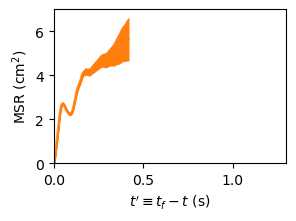

In [23]:
#DONE: increase the apparent bin size for LR at large time scales
#HINT: using moving average is valid!
# tmaxlr=0.42 #sec
tmaxlr=0.92 #sec
miny_lr = np.min(y_values_lr)
boo_lr=x_values_lr*tscale<tmaxlr
xlr = x_values_lr[boo_lr]*tscale
ylr = y_values_lr[boo_lr]-miny_lr
yerrlr = yerr_values_lr[boo_lr].copy()

#moving time average where t > tminlr_avg 
tminlr_avg=0.2 #sec
navg=25
# navg=1
boo = xlr>tminlr_avg
xlr = np.concatenate([xlr[~boo],moving_average(xlr[boo],navg)])
ylr = np.concatenate([ylr[~boo],moving_average(ylr[boo],navg)])
yerrlr = np.concatenate([yerrlr[~boo],moving_average(yerrlr[boo],navg)])
#filter by max time
tmaxlr=0.42 #sec
boo_lr=xlr<tmaxlr
xlr = xlr[boo_lr].copy()
ylr = ylr[boo_lr].copy()
yerrlr = yerrlr[boo_lr].copy()
print(f"approximate time window: {navg*(0.00692723-0.00186675):.2f} seconds")
#DONT: add the variances?
#DONE: or better, average the variances. 

fig,ax=plt.subplots(figsize=(3,2))
ax.plot(xlr,ylr,lw=2,alpha=0.8,c='C1')
ax.fill_between(xlr,ylr-yerrlr,ylr+yerrlr,lw=1,alpha=alpha,color='C1')
format_plot(ax=ax,xlabel=r"$t'\equiv t_f-t$ (s)",ylabel=r'MSR (cm$^2$)',fontsize=10)
plt.xlim([0,1.3])
plt.ylim([0,7])
plt.show()

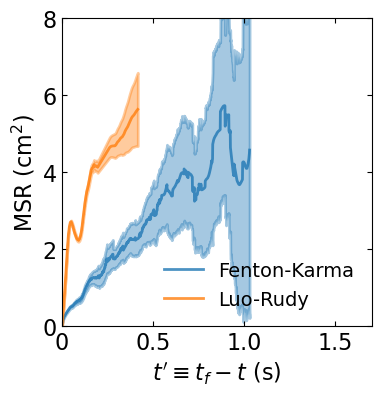

In [24]:
#plot MSR_Osc over the direct simulation results
lw=2
alpha=0.4
fontsize=16
# fontsize=18
# # # figsize=(8,4.2)
# # figsize=(4,4.2)
# # figsize=(6,4)
# figsize=(6.1,4)
figsize=(4,4)
# fontsize=15
### plot expected
# fontsize=20
tscale=1e-3

fig,ax=plt.subplots(figsize=figsize)

# #plot simulated annealing fits of oscillatory particle model
# phi_f = dict_osc_fit_fk['phase']
# omega = dict_osc_fit_fk['omega']*1e3
# a = dict_osc_fit_fk['a1']
# D = dict_osc_fit_fk['a0']/2
# # t_values=np.linspace(0,1,1000)
# t_values=np.linspace(0,1.1,1000)
# # MSR_values_oscillatory=4*(a*t_values+(2*D/omega)*(np.sin(omega*t_values+phi_f))+constant
# MSR_values_oscillatory=4*(2*D*t_values+(a/omega)*(np.sin(omega*t_values+phi_f)-np.sin(phi_f)))
# # MSR_values_oscillatory_fk = MSR_values_oscillatory.copy()
# ax.plot(t_values,MSR_values_oscillatory,c='k',#'C2',
#                 label=r'Osc. Particle Fit to FK')
# #plot simulated annealing fits of oscillatory particle model
# phi_f = dict_osc_fit_lr['phase']
# omega = dict_osc_fit_lr['omega']*1e3
# a = dict_osc_fit_lr['a1']
# D = dict_osc_fit_lr['a0']/2
# t_values=np.linspace(0,1,1000)
# # MSR_values_oscillatory=4*(a*t_values+(2*D/omega)*(np.sin(omega*t_values+phi_f))+constant
# MSR_values_oscillatory=4*(2*D*t_values+(a/omega)*(np.sin(omega*t_values+phi_f)-np.sin(phi_f)))
# # MSR_values_oscillatory_lr = MSR_values_oscillatory.copy()
# ax.plot(t_values,MSR_values_oscillatory,c='C3',
#                 label=r'Osc. Particle Fit to LR')
# #                 label=r'$MSR_{Osc.}(a=a_{FK},\phi_f=-\frac{\pi}{2})$')

# #plot the linear particle model
# ax.plot(t_values,4*amax_fk*t_values,c='k',linestyle='dashed')
# ax.plot(t_values,4*amax_lr*t_values,c='C3',linestyle='dashed')
# # ax.plot(t_values,4*amax_fk*t_values,c='C0',linestyle='dashed')
# # ax.plot(t_values,4*amax_lr*t_values,c='C1',linestyle='dashed')

# # #plot the direct simulation of the oscillatory particle model under these same parameter settings
# # stepsize=2500
# # plt.scatter(dict_fit_fk['tdeath'][::stepsize],dict_fit_fk['MSR'][::stepsize],lw=2,alpha=.7,c='k',#'C2',
# #             marker='x')#,label='Simulation of Osc. (FK)')
# # stepsize=1000
# # plt.scatter(dict_fit_lr['tdeath'][::stepsize],dict_fit_lr['MSR'][::stepsize],lw=2,alpha=.7,c='C3',
# #             marker='x')#,label='Simulation of Osc. (LR)')

# # #plot msd data from full (works worse)
# # ax.plot(x_values_fk*tscale,y_values_fk,lw=2,alpha=0.8,c='C0')
# # ax.fill_between(x_values_fk*tscale,y_values_fk-yerr_values_fk,y_values_fk+yerr_values_fk,lw=lw,alpha=alpha,color='C0')
# # ax.plot(x_values_lr*tscale,y_values_lr,lw=2,alpha=0.8,c='C1')
# # ax.fill_between(x_values_lr*tscale,y_values_lr-yerr_values_lr,y_values_lr+yerr_values_lr,lw=lw,alpha=alpha,color='C1')

#plot msd data from full with minimum subtracted (works better)
miny = np.min(y_values_fk)
ax.plot(x_values_fk*tscale,y_values_fk-miny,lw=2,alpha=0.8,c='C0',label='Fenton-Karma')
ax.fill_between(x_values_fk*tscale,y_values_fk-yerr_values_fk-miny,y_values_fk+yerr_values_fk-miny,lw=lw,alpha=alpha,color='C0')

ax.plot(xlr,ylr,lw=2,alpha=0.8,c='C1',label='Luo-Rudy')
ax.fill_between(xlr,ylr-yerrlr,ylr+yerrlr,lw=lw,alpha=alpha,color='C1')
# miny_lr = np.min(y_values_lr)
# tmaxlr=0.42 #sec
# boo_lr=x_values_lr*tscale<tmaxlr
# ax.plot(x_values_lr[boo_lr]*tscale,y_values_lr[boo_lr]-miny_lr,lw=2,alpha=0.8,c='C1')
# ax.fill_between(x_values_lr[boo_lr]*tscale,y_values_lr[boo_lr]-yerr_values_lr[boo_lr]-miny_lr,
#                 y_values_lr[boo_lr]+yerr_values_lr[boo_lr]-miny_lr,lw=lw,alpha=alpha,color='C1')
# # ax.plot(x_values_lr*tscale,y_values_lr-miny_lr,lw=2,alpha=0.8,c='C1')
# # ax.fill_between(x_values_lr*tscale,y_values_lr-yerr_values_lr-miny_lr,y_values_lr+yerr_values_lr-miny_lr,lw=lw,alpha=alpha,color='C1')

#format_plot
# format_plot(ax=ax,xlabel=r'$t_f-t$ (seconds)',ylabel=r'MSR (cm$^2$)',fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$t'\equiv t_f-t$ (s)",ylabel=r'MSR (cm$^2$)',fontsize=fontsize)

# plt.xlim([0,1])
# plt.xlim([0,1.1])
plt.xlim([0,1.3])
plt.xlim([0,1.7])
# plt.xlim([0,2])
# plt.ylim([0,4.6])
# plt.ylim([0,6])
# plt.ylim([0,7])
plt.ylim([0,8])

ax.tick_params(bottom=True,left=True,top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False,loc='lower right')
xticklabels = [str(x) for x in ax.get_xticks()]
xticklabels[0] = '0'
# xticklabels[3] = '0.6'
ax.set_xticklabels(xticklabels)
plt.show()

In [221]:
width=250
A = (DS*width)**2
print(f"{A=} cm^2")
DS*width

A=39.0625 cm^2


6.25

In [222]:
A/25

1.5625

# compute histogram of minimum lifetimes at a given domain size

In [292]:
range_data_dir_fk=f'{nb_dir}/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl'
range_data_dir_lr=f'{nb_dir}/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
# range_data_dir_fk=f'{nb_dir}/Data/from_wjr/positions_fk/250x250/tippos_per_001_annihilation_range_timeseries.pkl'
# range_data_dir_lr=f'{nb_dir}/Data/from_wjr/positions_lr/250x250/tippos_per_c_001_annihilation_range_timeseries.pkl'
assert os.path.exists(range_data_dir_fk)
assert os.path.exists(range_data_dir_lr)

In [293]:
#load apparent ranges
data_lst=load_from_pickle(range_data_dir_fk)
num_termination_events_fk = len(data_lst)
print(f"loaded range timeseries from {num_termination_events_fk} termination events (FK)")
df_ranges_fk=pd.concat(data_lst)
del data_lst
print(f"{df_ranges_fk.shape=}")
#load apparent ranges
data_lst=load_from_pickle(range_data_dir_lr)
num_termination_events_lr = len(data_lst)
print(f"loaded range timeseries from {num_termination_events_lr} termination events (LR)")
df_ranges_lr=pd.concat(data_lst)
del data_lst
print(f"{df_ranges_lr.shape=}")

loaded range timeseries from 80 termination events (FK)
df_ranges_fk.shape=(3846532, 9)
loaded range timeseries from 595 termination events (LR)
df_ranges_lr.shape=(524869, 9)


In [294]:
#compute minlifetime_values
minlifetime_values_fk = df_ranges_fk.groupby(by=['trial_num','annihilation_index'])['tdeath'].max().values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values_fk)
printing=True
if printing:
    print(f" - FK: mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {num_termination_events_fk} termination events")
    
minlifetime_values_lr = df_ranges_lr.groupby(by=['trial_num','annihilation_index'])['tdeath'].max().values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values_lr)
printing=True
if printing:
    print(f" - LR: mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {num_termination_events_lr} termination events")
    

 - FK: mean lifetime: 105.3196 +/- 1.6721 ms (N=36179, p_normal: 0.7748) from 80 termination events
 - LR: mean lifetime: 33.3659 +/- 0.7282 ms (N=15273, p_normal: 0.9471) from 595 termination events


In [295]:
df = df_ranges_fk.copy()
df['SR']=df['R']**2
print(f"time average first estimation of R_rms is much smaller than the converse:")
meansqrange_values = df.groupby(by=['trial_num','annihilation_index'])['SR'].mean().values
meanSR,Delta_meanSR,num_obsSR,p_normalSR=comp_mean_bootstrap_uncertainty(meansqrange_values)
if printing:
    print(f"Fenton-Karma:")
    print(f"- mean squared range: {meanSR:.4f} +/- {Delta_meanSR:.4f} cm^2 (N={num_obsSR}, p_normal: {p_normalSR:.4f})")# from {num_termination_events} termination events")
    print(f"- root mean squared range: {np.sqrt(meanSR):.4f} +/- {0.5*np.sqrt(Delta_meanSR)/np.sqrt(meanSR):.4f} cm (N={num_obsSR}, p_normal: {p_normalSR:.4f})")# from {num_termination_events} termination events")
dict_SR_fk = dict(meanSR=meanSR,Delta_meanSR=Delta_meanSR,num_obsSR=num_obsSR,p_normalSR=p_normalSR)
    
df = df_ranges_lr.copy()
df['SR']=df['R']**2
meansqrange_values = df.groupby(by=['trial_num','annihilation_index'])['SR'].mean().values
meanSR,Delta_meanSR,num_obsSR,p_normalSR=comp_mean_bootstrap_uncertainty(meansqrange_values)
if printing:
    print(f"Luo-Rudy:")
    print(f"- mean squared range: {meanSR:.4f} +/- {Delta_meanSR:.4f} cm^2 (N={num_obsSR}, p_normal: {p_normalSR:.4f})")# from {num_termination_events} termination events")
    print(f"- root mean squared range: {np.sqrt(meanSR):.4f} +/- {0.5*np.sqrt(Delta_meanSR)/np.sqrt(meanSR):.4f} cm (N={num_obsSR}, p_normal: {p_normalSR:.4f})")# from {num_termination_events} termination events")
dict_SR_lr = dict(meanSR=meanSR,Delta_meanSR=Delta_meanSR,num_obsSR=num_obsSR,p_normalSR=p_normalSR)
    

time average first estimation of R_rms is much smaller than the converse:
Fenton-Karma:
- mean squared range: 0.4435 +/- 0.0065 cm^2 (N=36179, p_normal: 0.8722)
- root mean squared range: 0.6659 +/- 0.0606 cm (N=36179, p_normal: 0.8722)
Luo-Rudy:
- mean squared range: 0.7396 +/- 0.0158 cm^2 (N=15273, p_normal: 0.9215)
- root mean squared range: 0.8600 +/- 0.0730 cm (N=15273, p_normal: 0.9215)


In [296]:
# bins=np.linspace(10,2500,100)*DT
# bins=np.logspace(-2,1,40)
bins=np.logspace(-2,1,40)
#DONE: compute the histograms
barheights_fk,bins_fk = np.histogram(
    minlifetime_values_fk*1e-3,
    bins=bins,#10,
    range=None,
    normed=None,
    weights=None,
    density=True,
)
x_fk=0.5*(bins_fk[1:]+bins_fk[:-1])

barheights_lr,bins_lr = np.histogram(
    minlifetime_values_lr*1e-3,
    bins=bins[bins<0.45],#10,
    range=None,
    normed=None,
    weights=None,
    density=True,
)
x_lr=0.5*(bins_lr[1:]+bins_lr[:-1])

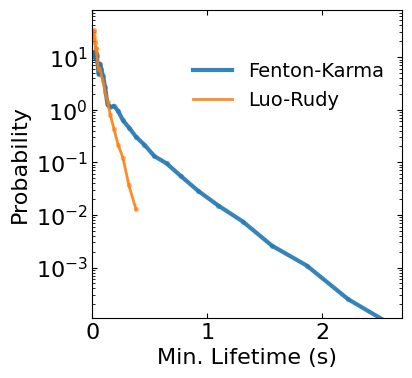

In [297]:
#DONE: compute the minimum lifetimes of particles
#TODO: plot the minimum lifetimes of particles
lw=2
alpha=0.9
# fontsize=18
fontsize=16
# use_loglog=True
use_loglog=False
# figsize=(6,4)
figsize=(4,4)
#check if msd=0 at lagt=0
fig,ax=plt.subplots(figsize=figsize)
ax.plot(x_fk,barheights_fk,c='C0',lw=lw+1,alpha=alpha,label='Fenton-Karma')
ax.scatter(x_fk,barheights_fk,c='C0',s=8,alpha=alpha/2,zorder=0)
# boolr=barheights_lr>1e-5
# ax.plot(x_lr[boolr],barheights_lr[boolr],c='C1',lw=lw,alpha=alpha,label='Luo-Rudy')
# ax.scatter(x_lr[boolr],barheights_lr[boolr],c='C1',s=8,alpha=alpha/2,zorder=0)
ax.plot(x_lr,barheights_lr,c='C1',lw=lw,alpha=alpha,label='Luo-Rudy')
ax.scatter(x_lr,barheights_lr,c='C1',s=8,alpha=alpha/2,zorder=0)

# xv1=np.linspace(0.01,0.5,10)
# xv2=np.linspace(0.1,5,10)
# ax.plot(xv1,dict_fit_lr['M']*xv1+0.,'k-',lw=2,alpha=0.7)
# ax.plot(xv2,dict_fit_fk['M']*xv2+0.,'k-',lw=2,alpha=0.7)

#format_plot
ax.set_yscale('log')
# ax.set_xlim([0,3.5])
ax.set_xlim([0,2.7])
ax.set_ylim((11*1.0178650359332904e-05, 80))
format_plot(ax=ax,xlabel=r'Min. Lifetime (s)',ylabel=r'Probability',fontsize=fontsize,use_loglog=use_loglog)
# format_plot(ax=ax,xlabel=r'$\Gamma$ (s)',ylabel=r'PDF',fontsize=fontsize,use_loglog=use_loglog)
ax.tick_params(top=True, right=True,direction='in',which='both')
# ax.legend(fontsize=fontsize-2,frameon=False,loc='upper right')
# ax.legend(fontsize=fontsize-2,frameon=False,loc='center right')
ax.legend(fontsize=fontsize-2,frameon=False,loc=(0.3,0.65))
#format_plot
plt.show()

In [277]:
#TODO(?): compute the effect of 200x200 --> 250x250 on gamma
effect_on_gamma_fk = (91.2055 - 105.3196)/105.3196
effect_on_gamma_lr = (40.4644 - 33.3659)/33.3659
change_in_A = (39.0625 - 25)/25
print(f"For the FK model, increasing $A$ by {change_in_A:.2%} decreased lifetime by {effect_on_gamma_fk:.4%}.")
print(f"For the LR model, increasing $A$ by {change_in_A:.2%} decreased lifetime by {effect_on_gamma_lr:.4%}.")

For the FK model, increasing $A$ by 56.25% decreased lifetime by -13.4012%.
For the LR model, increasing $A$ by 56.25% decreased lifetime by 21.2747%.


 - FK: mean lifetime: 105.3196 +/- 1.7241 ms (N=36179, p_normal: 0.9328) from 80 termination events
→  - FK: mean lifetime: 91.2055 +/- 0.6729 ms (N=189141, p_normal: 0.3627) from 29 termination events

 - LR: mean lifetime: 33.3659 +/- 0.7169 ms (N=15273, p_normal: 0.6845) from 595 termination events

→  - LR: mean lifetime: 40.4644 +/- 0.5996 ms (N=25096, p_normal: 0.6661) from 384 termination events

In [298]:
DS

0.025